In [3]:
from __future__ import print_function
import pandas as pd 
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objs as go
import requests 
import html5lib
from bs4 import BeautifulSoup
import re
import pandas as pd
import folium
import webbrowser
from IPython.core.display import display, HTML
import locale
locale.setlocale(locale.LC_ALL,'fr_FR.UTF-8')
import pandas as pd
import datetime as dt
import plotly.graph_objects as g
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import json
#model ARIMA
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from numpy import log
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import pmdarima as pm
from pmdarima.datasets import load_sunspots
from pmdarima.model_selection import train_test_split
print(f"Using pmdarima {pm.__version__}")
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import IPython
from IPython.display import display, Image
from IPython.display import HTML

import pandas as pd
import datetime as dt
import plotly.graph_objects as g



confirmes_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
retablis_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deces_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
pays_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
# nettoyage des données 

confirmes_df =confirmes_df.rename(columns={'Province/State':'state','Country/Region':'country'})
retablis_df =retablis_df.rename(columns={'Province/State':'state','Country/Region':'country'})
deces_df =deces_df.rename(columns={'Province/State':'state','Country/Region':'country'})
pays_df =pays_df.rename(columns={'Country_Region':'country'})


pays_trie = pays_df.sort_values('Confirmed', ascending=False)
#total par type de cas 
confirmed_total = int(pays_df['Confirmed'].sum())
deaths_total = int(pays_df['Deaths'].sum())
recovered_total = int(pays_df['Recovered'].sum())
active_total = int(pays_df['Active'].sum())
# publication des totaux de cas au niveau Mondial 
display(HTML("<h1> Situation Covid-19 Au niveau Mondial</h1>"+"<div style = 'background-color: #504e4e; padding: 20px '>" + 
             "<span style='color: #fff; font-size:15px;margin-left:20px'> Cas Confirmés : "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:15px;margin-left:20px;'> Cas Décédés : " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:15px; margin-left:20px;'> Cas Rétablis: " + str(recovered_total) + "</span>"+
             "</div>")
       )

def color_set(x):
    r= 'background-color: red'
    p='background-color: purple'
    g= 'background-color: green'
    temp_df =pd.DataFrame('',index=x.index,columns=x.columns)
    temp_df.iloc[:,4] =p
    temp_df.iloc[:,5] =r
    temp_df.iloc[:,6] =g
    return temp_df

Using pmdarima 1.6.0


In [4]:
display(HTML("<h4> Situation des cas confirmés Covid-19 entre les pays US,France,Morocco,Spain,Algeria</h4>")
       )

In [7]:
pays=['US','Germany','Morocco','Spain','Algeria']

In [8]:
fig = px.scatter(pays_trie.loc[pays_trie['country'].isin(pays)],x='country',y='Confirmed',size='Confirmed',color='country', hover_name='country' ,size_max=80)
fig.show()

In [9]:
display(HTML("<h4> Situation des cas confirmés- décédés Covid-19 par pays </h4>"))
def affichage_country(country):
    
    labels= ['confirmés','décédés']
    colors = ['blue','red']
    mode_size =[6,8]
    line_size = [4,5]
    df_list=[confirmes_df,deces_df]
    fig =go.Figure();
    for i ,df in enumerate(df_list):
        if country=='World' or country =='world':
            x_data= np.array(list(df.iloc[:, 5:].columns))
            y_data= np.sum(np.asarray(df.iloc[:, 5:]),axis=0)
        else:
            x_data= np.array(list(df.iloc[:, 5:].columns))
            y_data= np.sum(np.asarray(df[df['country']==country].iloc[:, 5:]),axis=0)

        fig.add_trace(go.Scatter(x=x_data,y=y_data,mode='lines+markers',
                        name=labels[i],
                        line=dict(color=colors[i],width=line_size[i]),
                        connectgaps=True,
                        text ='Total '+str(labels[i])+ ' : ' +str(y_data[-1])
                        ));
    fig.update_layout(
        title="Coronavirus Situation pour le pays : " + country,
        xaxis_title='Date',
        yaxis_title='Nombre des Cas confirmés',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 950,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();   
 
        
#affichage_country('Morocco')

interact(affichage_country, country='World')


interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.affichage_country(country)>

In [10]:
display(HTML("<h3 style = 'background-color: #504e4e; padding: 40px '> Top 20 des pays Covid-19 (Cas Confirmés)</h3>"))
px.bar(
    pays_trie.head(20),
    x = "country",
    y = "Confirmed",
    title= "Top 20 des pays Nombre de cas confirmés ", 
    color_discrete_sequence=["blue"], 
    height=500,
    width=800
)

In [11]:
pays_trie = pays_df.sort_values('Deaths', ascending=False)
display(HTML("<h3 style = 'background-color: #504e4e; padding: 40px '> Top 20 des pays Covid-19(Cas Décédés)</h3>"))
px.bar(
    pays_trie.head(20),
    x = "country",
    y = "Deaths",
    title= "Top 20 des pays Nombre de cas  Décédés", 
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)


In [12]:
pays_trie = pays_df.sort_values('Recovered', ascending=False)
display(HTML("<h3 style = 'background-color: #504e4e; padding: 40px '> Top 20 des pays Covid-19(Cas Rétablis)</h3>"))
px.bar(
    pays_trie.head(20),
    x = "country",
    y = "Recovered",
    title= "Top 20 des pays Nombre de cas Rétablis", 
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

In [13]:

#web scraping  collecte des données région du Maroc 
url = "https://aboullaite.github.io/Covid19-MA/pages_regions"
req = requests.get(url)
page = BeautifulSoup(req.text,'html5lib')
noeuds = page.find('div',{'id':'content'})  # div de id content
Tab_tag = noeuds.find('table')     #extraction du premier tableau  sur le div 'id =content'
tete = Tab_tag.find('thead') # extraction des thead du tableau
tete_tr = tete.find_all("th")[0:] #extraction d'ensemble de en-tété thead
noms_region = [tete_tr[i].text for i in range(len(tete_tr))] # nom des régions à partir des en-tété 
corps = Tab_tag.find('tbody') # extraction du corps du tableau 
corps_tr = corps.find_all('tr') # extraction l'ensemble des lignes 
conteneur = {}
for j in range(len(noms_region)):# bouble à partir corps du tableau on ajoute le pays et les données associé sur le td 
    conteneur[noms_region[j]] = [corps_tr[i].find_all("td")[0:][j].text for i in range(len(corps_tr))]

datas_maroc_region = pd.DataFrame.from_dict(conteneur)

datas_maroc_region=datas_maroc_region.sort_values(by ='Region / الجهة')
data_region_geo = pd.read_csv('geo_region_morocco.csv',sep=',')
data_region_geo =data_region_geo.sort_values(by ='region')

latitude = 31.794525  #Morocco latitude
longitude = -7.0849336 #Morocco longitude
cas_region_map = folium.Map(location=[latitude, longitude],zoom_start=5,zoom_control=False)
for lat, lon, region,tcases,acases,deaths,recovred, in zip(data_region_geo['lat'],data_region_geo['long'],data_region_geo['region'],datas_maroc_region['Total Cases / إجمالي الحالات'],datas_maroc_region['Active Cases / الحالات النشطة'],datas_maroc_region['Total Deaths / إجمالي الوفيات'],datas_maroc_region['Total Recovered / إجمالي المعافين']):

    folium.CircleMarker(
        [lat, lon],
        radius=((float(tcases)*0.25)/100)+15,
        tooltip = ('<div> <h3>' + str(region) + '</h3> <ul>'+
                 '<li> Total des cas Confirmés : ' + str(tcases) + '</li>'+
                 '<li> les Cas actifs : ' + str(acases) +'</li>'+
                 '<li>Total des décédés  : ' + str(deaths) +'</li>'+
                 '<li> Total des rétablis : ' + str(recovred) +'</li> </ul> </div>'
                ),
        color='pink',
        key_on = region,
        threshold_scale=[0,1,2,3],
        fill_color='purple',
        fill=True,
        fill_opacity=0.8
        ).add_to(cas_region_map)
display(HTML("<h3 style = 'background-color: #504e4e; padding: 40px '> Carte par Régions du Maroc Covid-19 </h3>"))


In [14]:
cas_region_map

In [15]:
display(HTML("<h3 style = 'background-color: #504eaa; padding: 40px '> étude comparative covid-19 'Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia'</h3>"))

In [16]:
# Chargement des données mondiales github
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_recovred = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed = pd.read_csv(url_confirmed, error_bad_lines=False)
recovred = pd.read_csv(url_recovred, error_bad_lines=False)
deaths= pd.read_csv(url_deaths, error_bad_lines=False)

# liste des pays de traitement 

#liste des pays 
pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
# Filtrage des données par pays.
countries_list_recovred = recovred.loc[recovred['Country/Region'].isin(pays)].copy().reset_index(drop=True)
countries_list_confirmed = confirmed.loc[confirmed['Country/Region'].isin(pays)].copy().reset_index(drop=True)
countries_list_deaths = deaths.loc[deaths['Country/Region'].isin(pays)].copy().reset_index(drop=True)
# Transformer les dataframes en séries temporelles . 
def to_series(df):
    #supprimer les colonnes 'Province/State','Lat','Long'
    df_trans = df.drop(columns=['Province/State','Lat','Long']).rename(columns={'Country/Region':' '}).set_index(' ').transpose()
    #transposer le dataframe on index colonne date 
    df_trans.index = pd.to_datetime(df_trans.index)
    return(df_trans)
#création des séries temporelles cas : rétablis,confirmés ,décès
serie_recovred = to_series(countries_list_recovred)     
serie_confirmed = to_series(countries_list_confirmed)
serie_deaths = to_series(countries_list_deaths)
serie_confirmed = serie_confirmed.loc[serie_confirmed.loc[serie_confirmed.sum(axis=1) > 0].index[0]:]
serie_deaths = serie_deaths.loc[serie_deaths.loc[serie_deaths.sum(axis=1) > 0].index[0]:]
serie_recovred = serie_recovred.loc[serie_recovred.loc[serie_recovred.sum(axis=1) > 0].index[0]:]


In [17]:
display(HTML("<h3 style = 'background-color: #504eaa; padding: 40px '> Affichage des données </h3>"))

In [18]:
fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_confirmed['Morocco'],
    x=serie_confirmed.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Algeria'],
    x=serie_confirmed.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Spain'],
    x=serie_confirmed.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Germany'],
    x=serie_confirmed.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Tunisia'],
    x=serie_confirmed.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des infections Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()

Text(0.5, 1.0, 'Evolution des infections Covid-19 par pays')

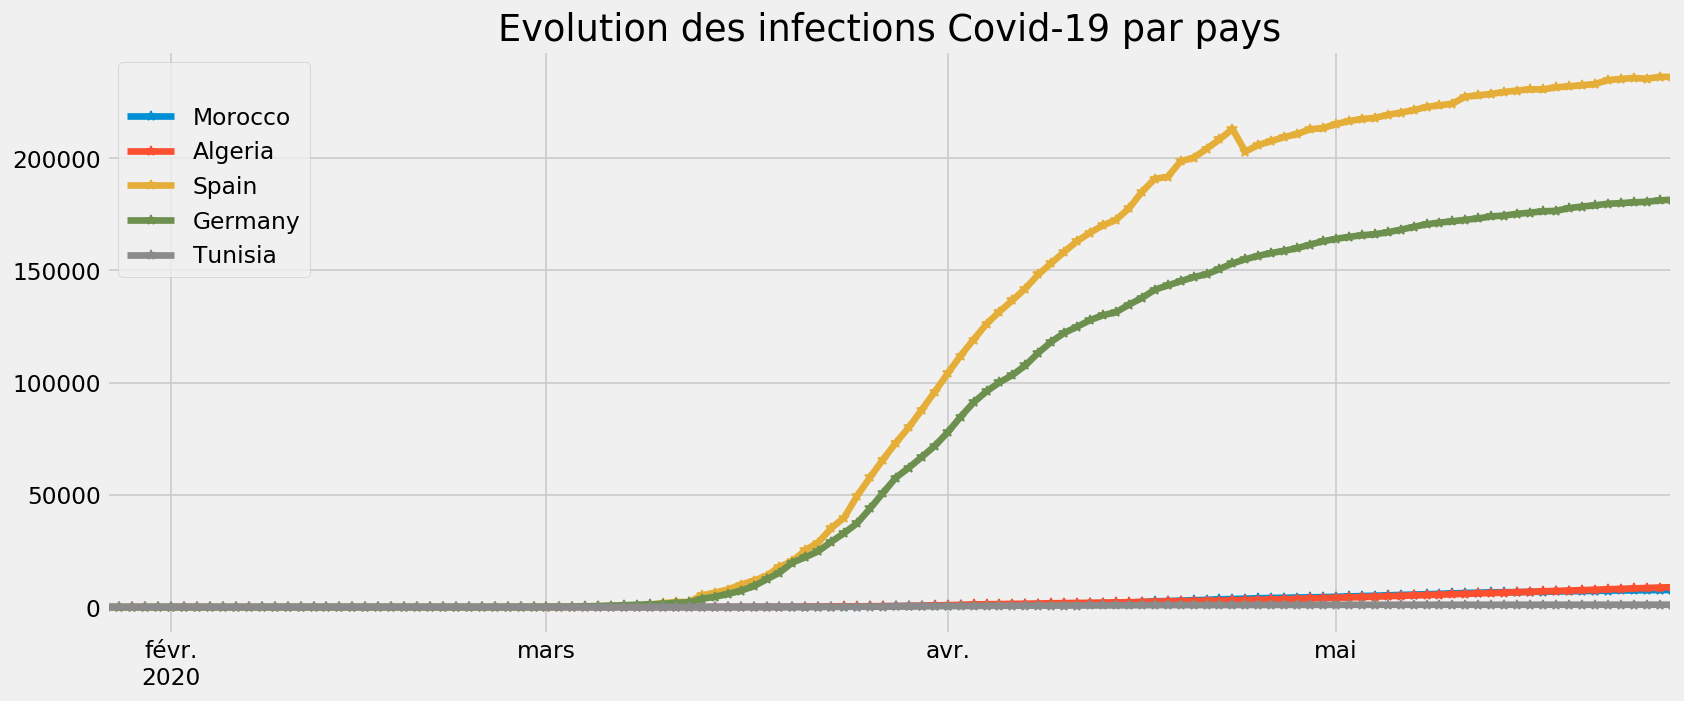

In [19]:
# Nombre des confirmés
serie_confirmed[['{}'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution des infections Covid-19 par pays',fontdict={'fontsize': 22})

In [20]:
# Nombre des guérisons

fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_recovred['Morocco'],
    x=serie_recovred.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Algeria'],
    x=serie_recovred.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Spain'],
    x=serie_recovred.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Germany'],
    x=serie_recovred.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Tunisia'],
    x=serie_recovred.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des rétablissements Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()

Text(0.5, 1.0, 'Evolution des rétablissements du Covid-19 par pays')

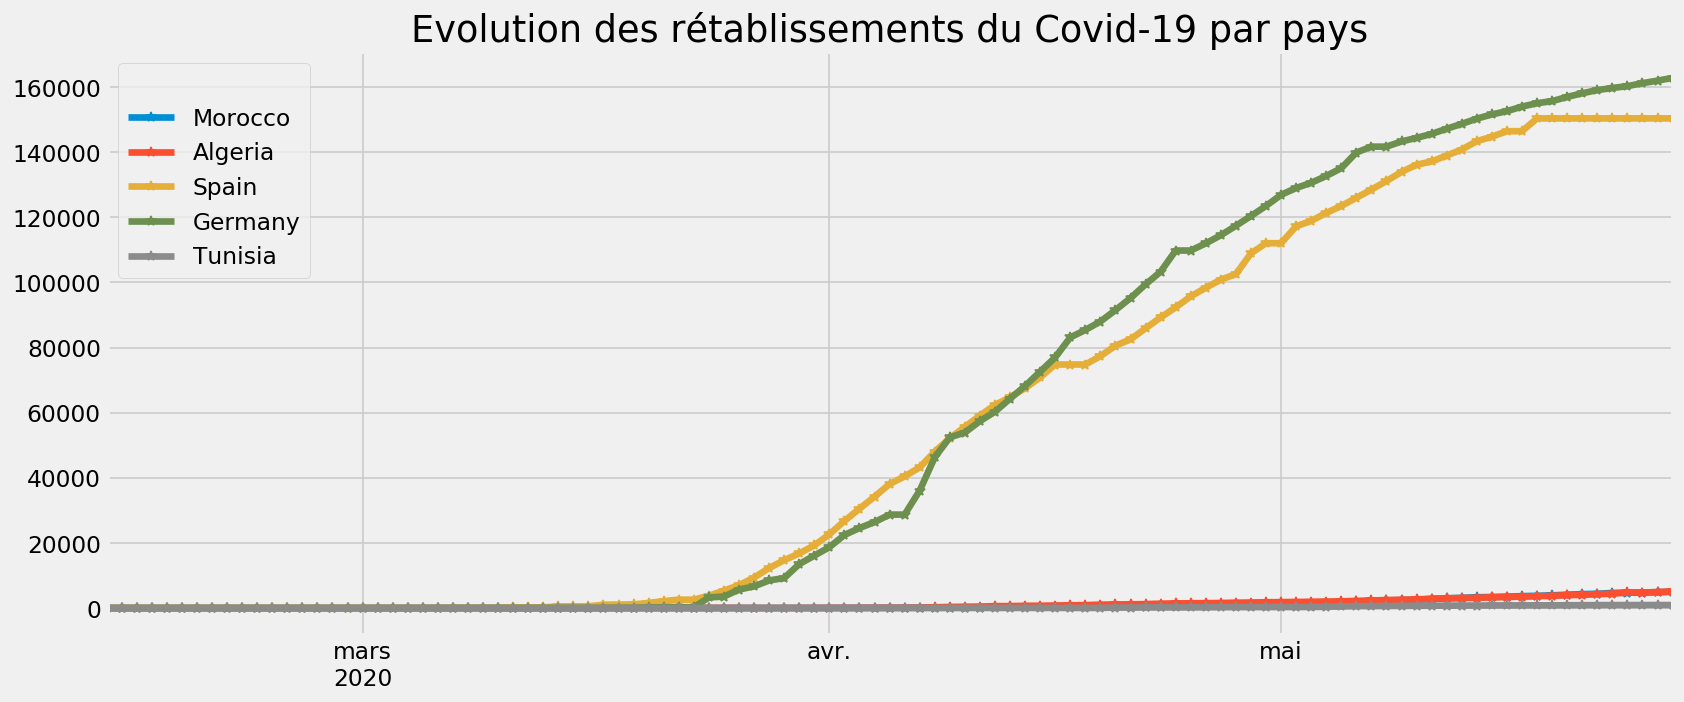

In [21]:
# Nombre des guérisons
serie_recovred[['{}'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution des rétablissements du Covid-19 par pays',fontdict={'fontsize': 22})

In [22]:
# Nombre des décès
fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_deaths['Morocco'],
    x=serie_deaths.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Algeria'],
    x=serie_deaths.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Spain'],
    x=serie_deaths.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Germany'],
    x=serie_deaths.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Tunisia'],
    x=serie_deaths.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des décédées Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()


Text(0.5, 1.0, 'Evolution des décédées du Covid-19 par pays')

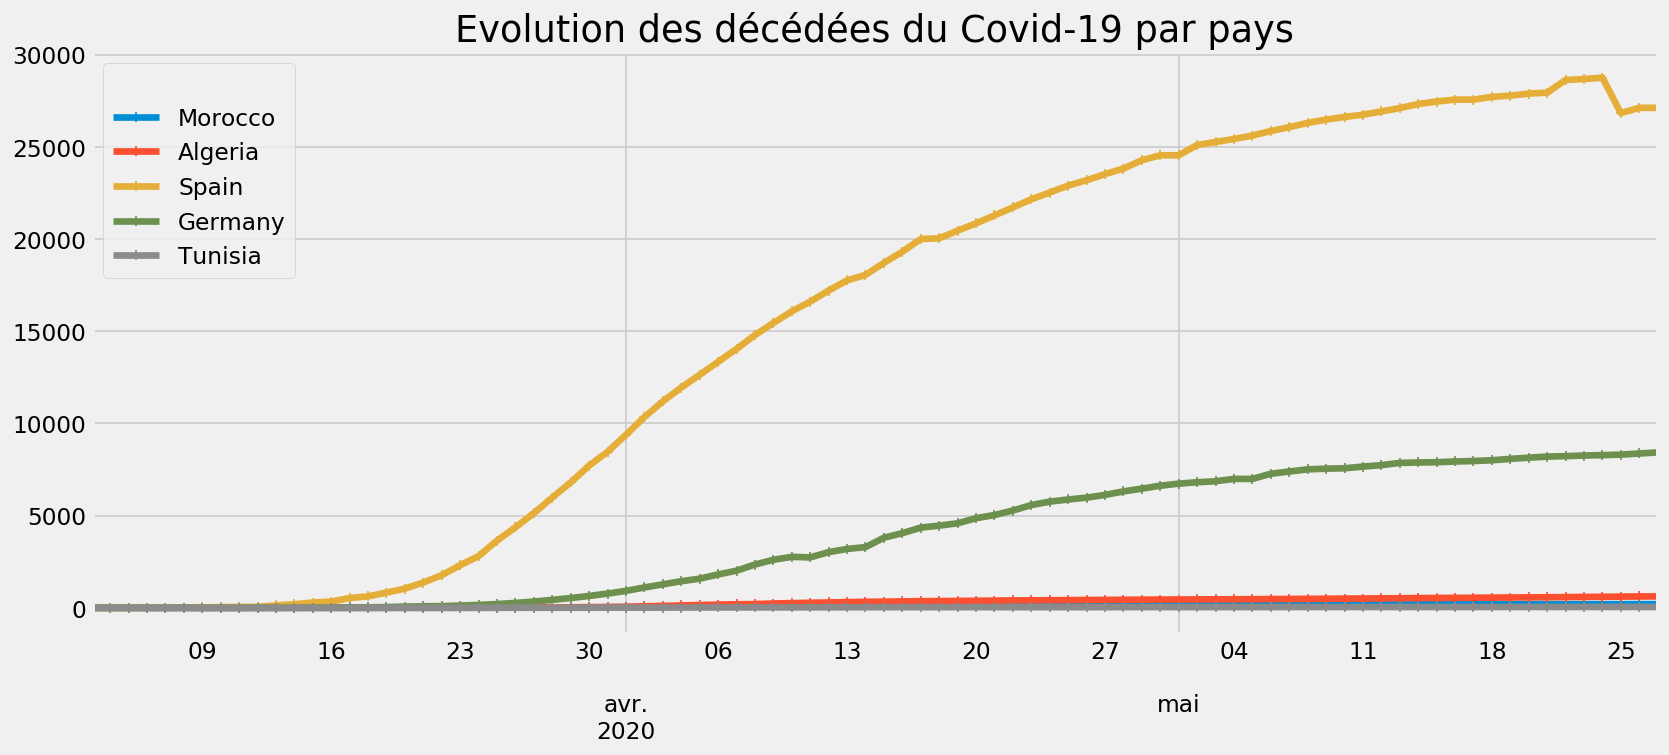

In [23]:
serie_deaths[['{}'.format(i) for i in pays]].plot(marker='+',figsize=(15,6)).set_title('Evolution des décédées du Covid-19 par pays',fontdict={'fontsize': 22})

In [24]:
"""
scraping des données population par pays  :
"""
display(HTML("<h3 style = 'background-color: #504eaa; padding: 40px '> scraping des données Nombre global de population par pays </h3>"))

In [25]:
url = "https://www.worldometers.info/world-population/population-by-country/"
req = requests.get(url)
page = BeautifulSoup(req.text,'html5lib')
noeuds = page.find('div','table-responsive') # div de classe table-responsive
region = noeuds.find('table','table table-striped table-bordered') #extraction du tableau de classe table table-striped table-bordered 
tete = region.find('thead') # extraction des thead du tableau
tete_tr = tete.find_all("th")[1:] #extraction d'ensemble de en-tété thead
noms = [tete_tr[i].text for i in range(len(tete_tr))] # nom des pays à partir des en-tété 
corps = region.find('tbody') # extraction du corps du tableau 
corps_tr = corps.find_all('tr') # extraction l'ensemble des lignes 
conteneur = {}
for j in range(len(noms)):# bouble à partir corps du tableau on ajoute le pays et les données associé sur le td 
    conteneur[noms[j]] = [corps_tr[i].find_all("td")[1:][j].text for i in range(len(corps_tr))]
datas = pd.DataFrame.from_dict(conteneur)# création dataframe à partir du fichier json ou dict

In [26]:
"""
extraction du nombre de population par pays en 2020 colonne indice 1 
"""
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
population2020 = datas.loc[datas['Country (or dependency)'].isin(pays)][['Country (or dependency)','Population (2020)']].copy().reset_index(drop=True).rename(columns={'Country (or dependency)':'Pays', 'Population (2020)':'Population_2020'})
# supprimer la présentation anglaise des chiffres :
population2020['Population_2020'] = population2020['Population_2020'].str.replace(',','').astype(int)

#Comparaison du comportement de chaque pays

def merge_df(name):
    df = serie_confirmed[[name]].copy()
    df.loc[serie_recovred.index, '{}_gueris'.format(name)] = serie_recovred[name].copy()
    df.loc[serie_deaths.index, '{}_mort'.format(name)] = serie_deaths[name].copy()
    df = df.rename(columns={name:'{}_cas'.format(name)})
    df = df.loc[df['{}_cas'.format(name)] > 0]
    df['{}_cas_par_pop1M'.format(name)] = round(1000000*df['{}_cas'.format(name)] /int(population2020.loc[population2020.loc[population2020['Pays']==name].index, 'Population_2020']), 2)
    df['{}_mort_par_100cas'.format(name)] = round(100*df['{}_mort'.format(name)] / df['{}_cas'.format(name)], 2)
    df['{}_gueris_par_100cas'.format(name)] = round(100*df['{}_gueris'.format(name)] / df['{}_cas'.format(name)], 2)
    df = df.fillna(0)
    df = df.reset_index(drop=True)
    df.index = df.index+1
    return df
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
Maroc = merge_df('Morocco')
Algeria = merge_df('Algeria')
Spain= merge_df('Spain')
Germany = merge_df('Germany')
Tunisia = merge_df('Tunisia')
Full_datas = pd.concat([Maroc, Algeria,Spain, Germany, Tunisia], axis=1)

Text(0.5, 1.0, 'Evolution du nombre cumulé de cas à partir du 1er jour.')

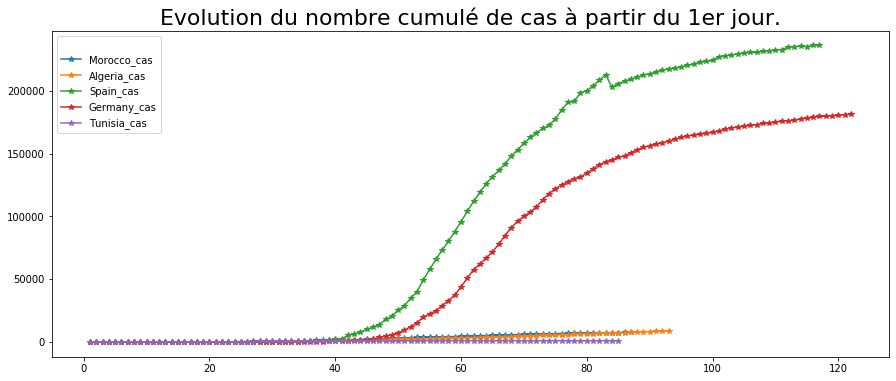

In [179]:
Full_datas[['{}_cas'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de cas à partir du 1er jour.',fontdict={'fontsize': 22})

Text(0.5, 1.0, "Evolution du nombre cumulé de cas par 1 million d'habitants à partir du 1er jour.")

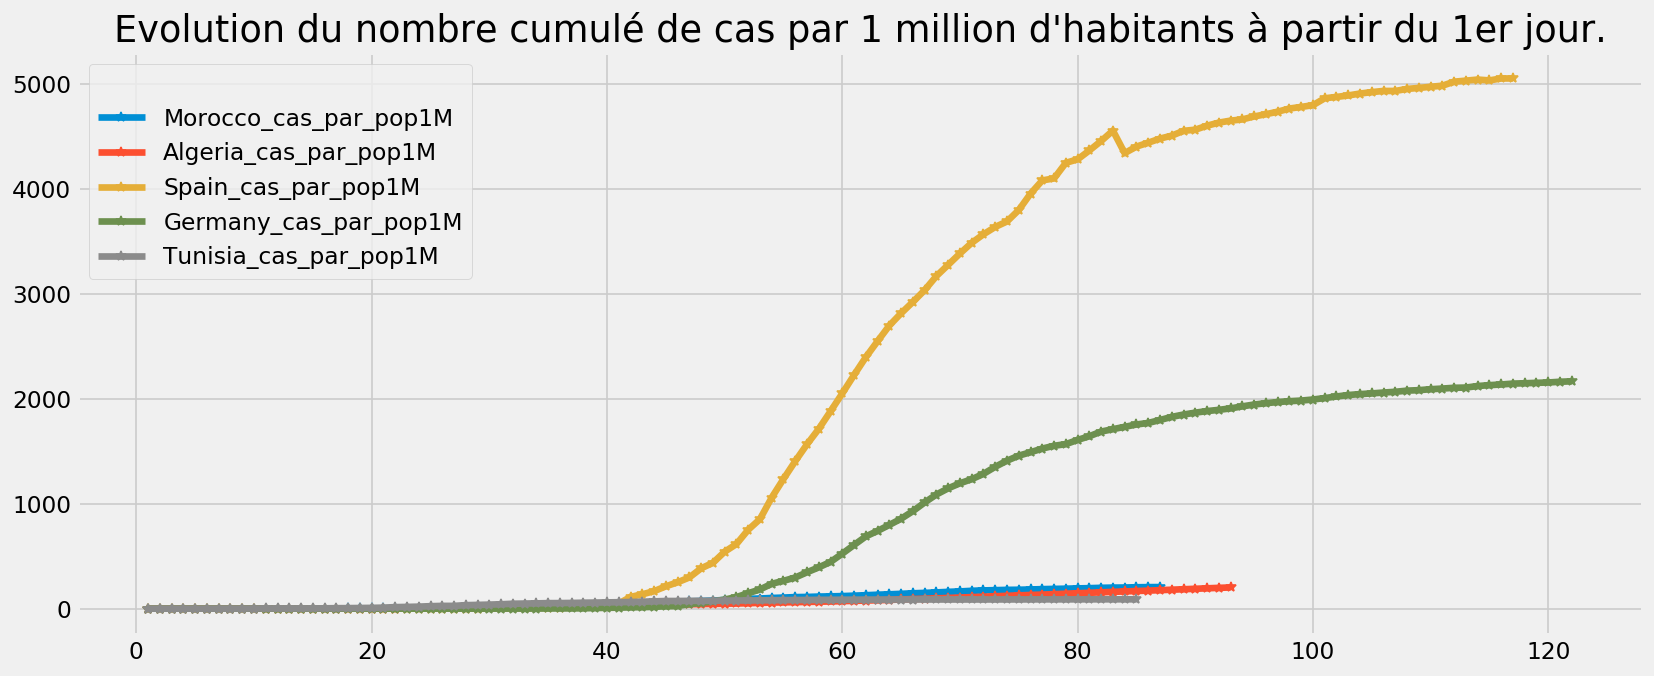

In [27]:
Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title("Evolution du nombre cumulé de cas par 1 million d'habitants à partir du 1er jour.",fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Evolution du nombre cumulé des rétablissements à partir du 1er jour de contamination')

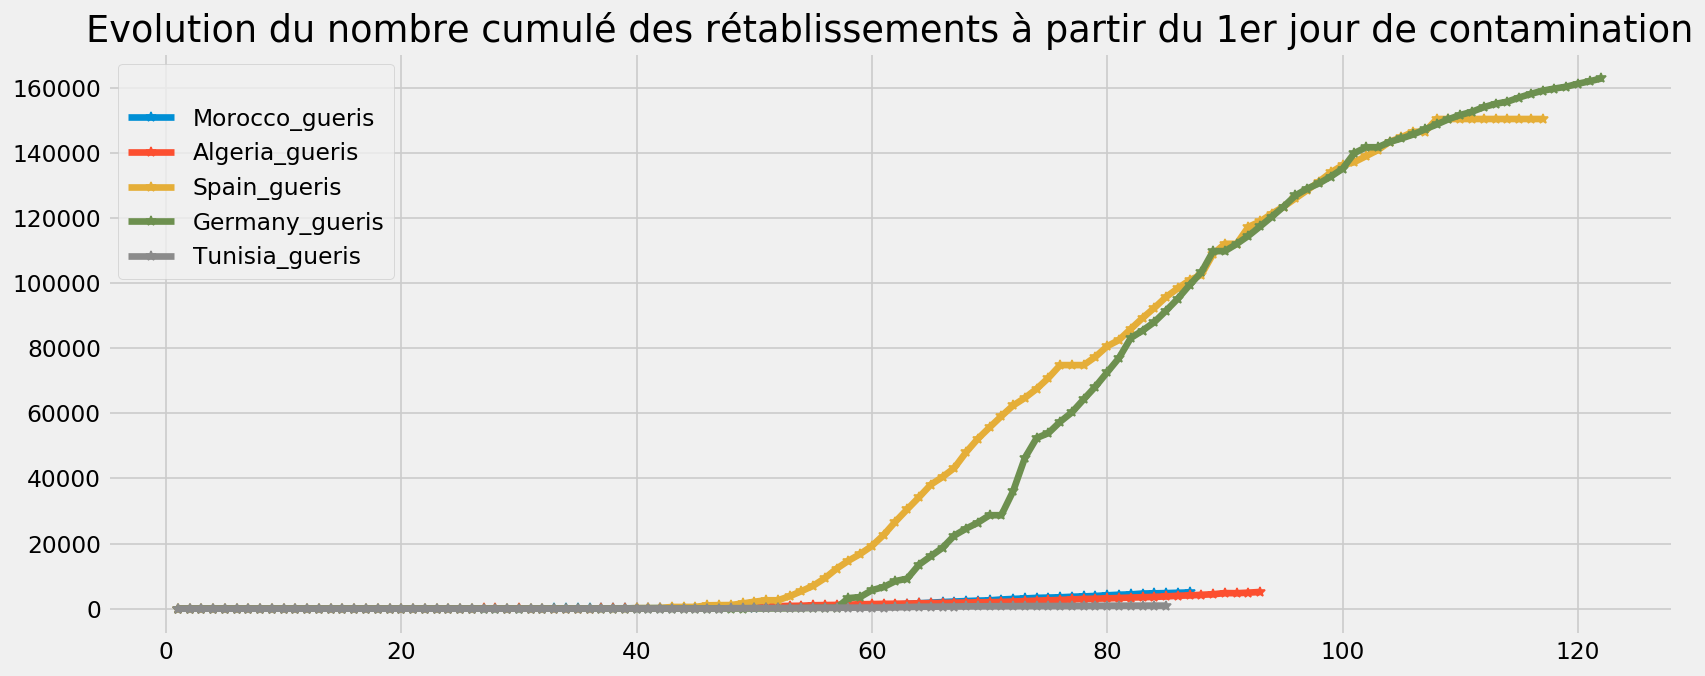

In [28]:
# Nombre des rétablis du covid19   par 100 contaminations
Full_datas[['{}_gueris'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé des rétablissements à partir du 1er jour de contamination',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Evolution du nombre cumulé des rétablissements par 100 malades à partir du 1er jour de contamination.')

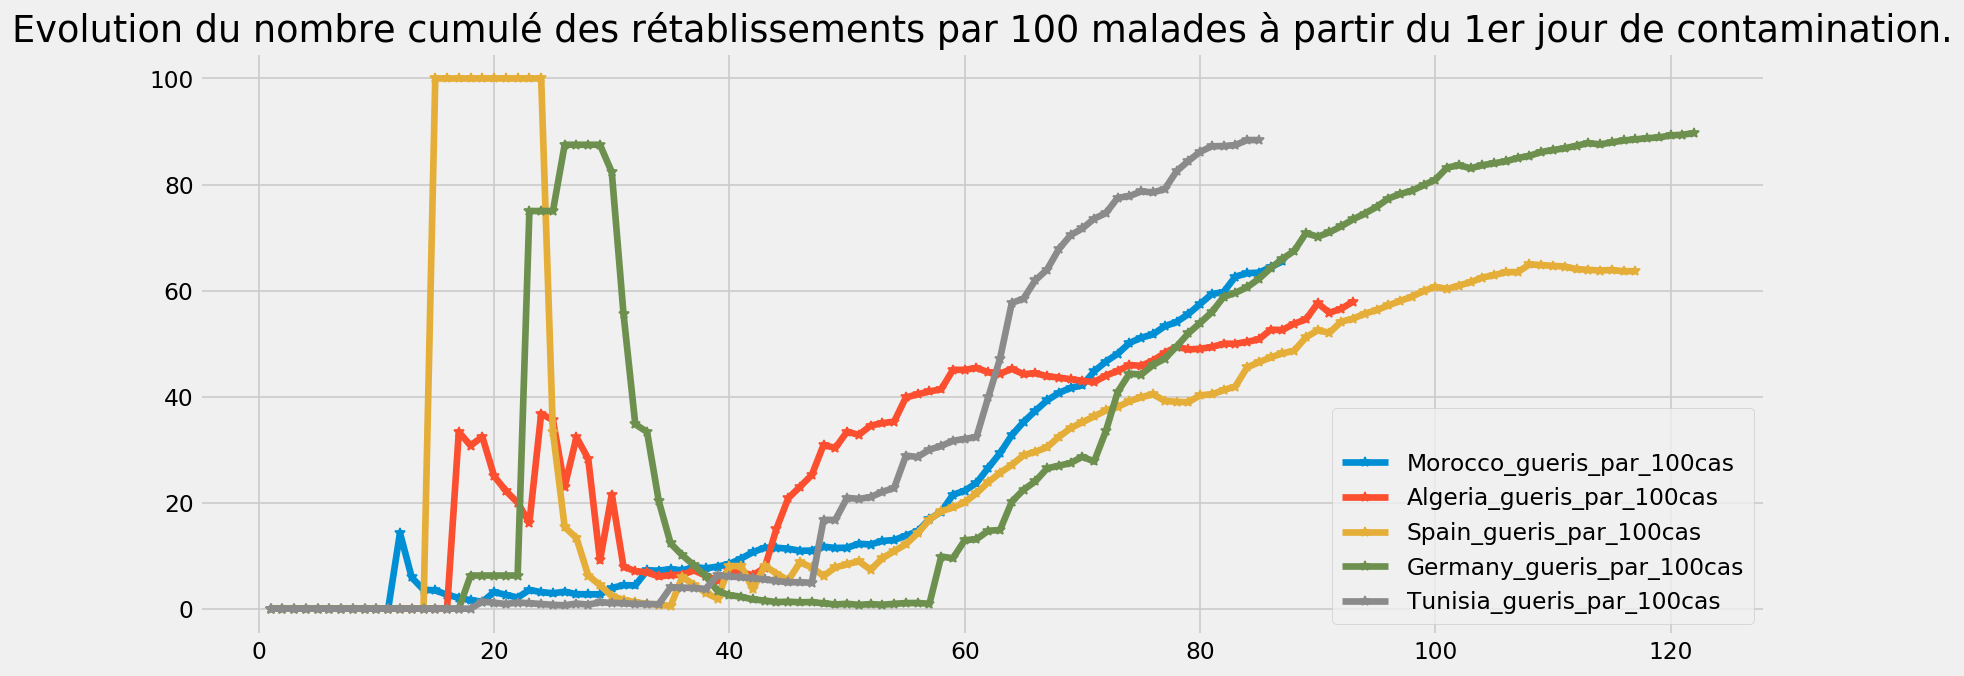

In [29]:
Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé des rétablissements par 100 malades à partir du 1er jour de contamination.',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Evolution du nombre cumulé de décès à partir du 1er jour de contamination')

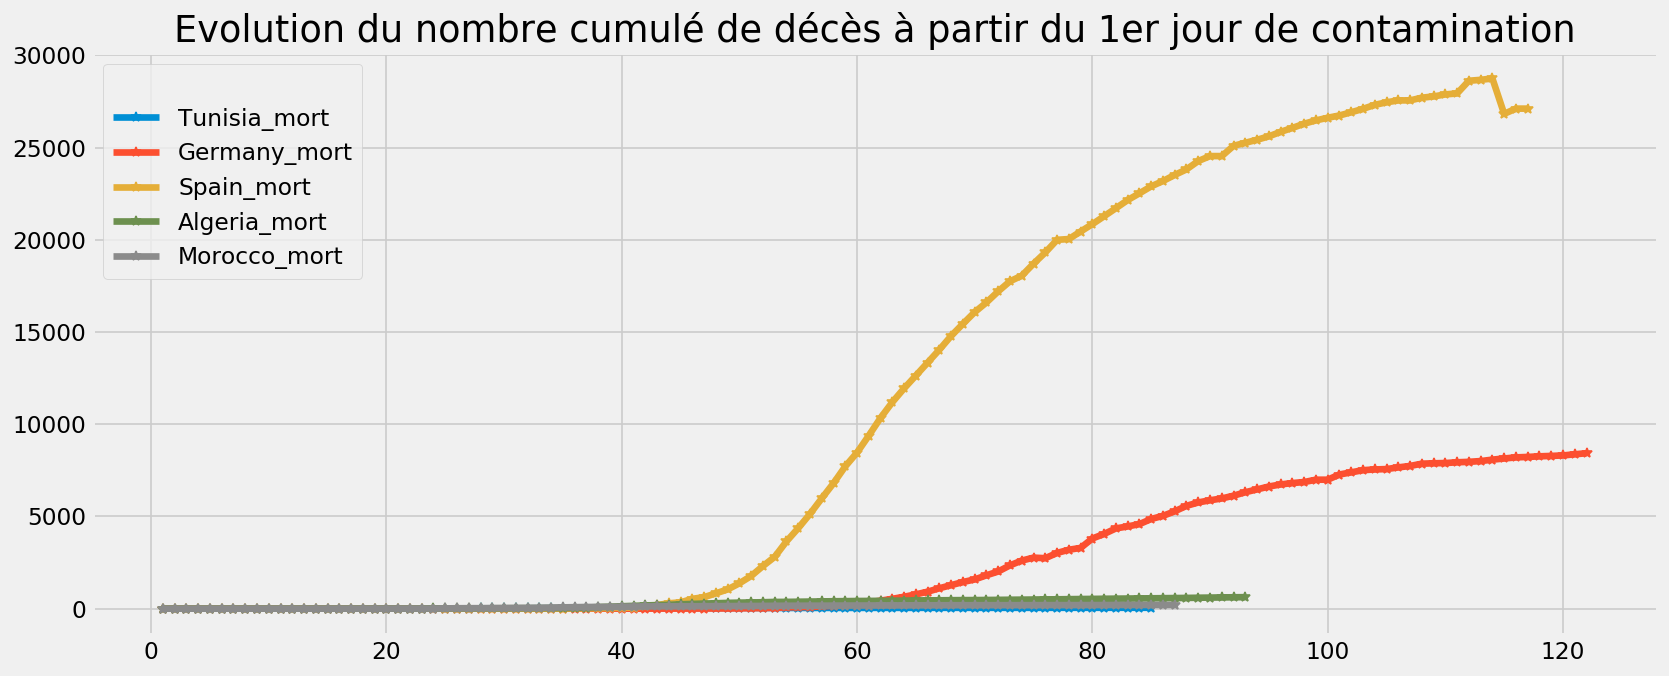

In [30]:
# Nombre de décès du covid19 puis par 100 contaminations
Full_datas[['{}_mort'.format(i) for i in pays[::-1]]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de décès à partir du 1er jour de contamination',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Evolution du nombre cumulé de décès par 100 malades à partir du 1er jour de contamination')

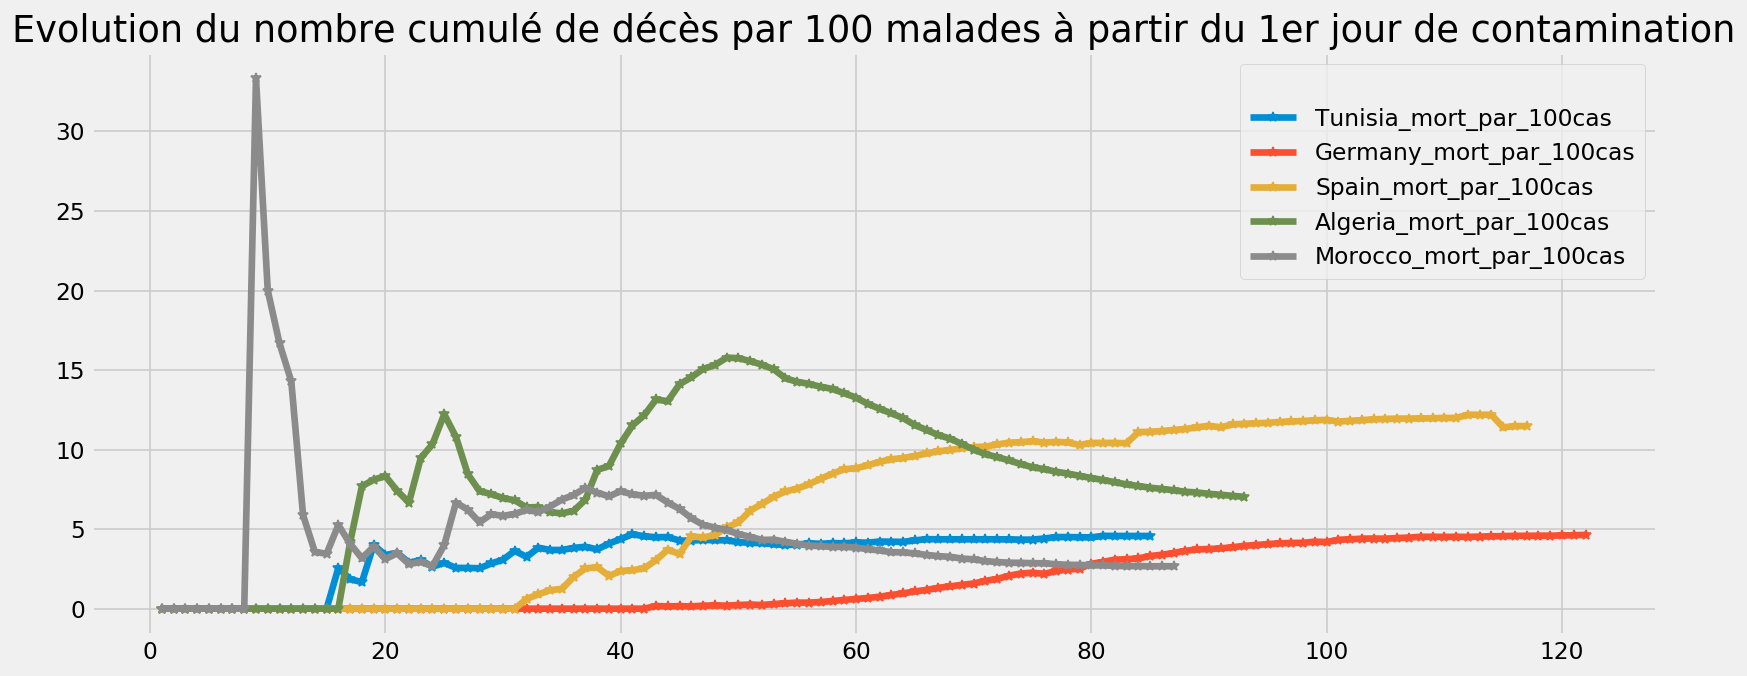

In [31]:
Full_datas[['{}_mort_par_100cas'.format(i) for i in pays[::-1]]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de décès par 100 malades à partir du 1er jour de contamination',fontdict={'fontsize': 22})

In [193]:
display(HTML("<h4 style = 'background-color: #FF0AA0; padding: 40px '> Conclusion des résultats  </h4>"))

In [32]:
#conclusion 

bilan = pd.DataFrame(columns=['Désignation', 'Pays', 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))])
i = 0
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas'.format(i) for i in pays]].max() == min(Full_datas[['{}_cas'.format(i) for i in pays]].max())].index[0].replace('_cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_cas'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas'.format(i) for i in pays]].max() == max(Full_datas[['{}_cas'.format(i) for i in pays]].max())].index[0].replace('_cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_cas'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max() == min(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max())].index[0].replace('_cas_par_pop1M','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 1 million d'habitants".format(min(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max()))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max() == max(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max())].index[0].replace('_cas_par_pop1M','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 1 million d'habitants".format(max(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max()))
i = i+1
bilan.loc[i, 'Désignation'] = ''
bilan.loc[i, 'Pays'] = ''
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = ''
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de guérison'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris'.format(i) for i in pays]].max().loc[Full_datas[['{}_gueris'.format(i) for i in pays]].max() == min(Full_datas[['{}_gueris'.format(i) for i in pays]].max())].index[0].replace('_gueris','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_gueris'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de guérison'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris'.format(i) for i in pays]].max().loc[Full_datas[['{}_gueris'.format(i) for i in pays]].max() == max(Full_datas[['{}_gueris'.format(i) for i in pays]].max())].index[0].replace('_gueris','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_gueris'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de rétablissement'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == min(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_gueris_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(min(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de rétablissement'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == max(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_gueris_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(max(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = ''
bilan.loc[i, 'Pays'] = ''
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = ''
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de décès'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort'.format(i) for i in pays]].max().loc[Full_datas[['{}_mort'.format(i) for i in pays]].max() == min(Full_datas[['{}_mort'.format(i) for i in pays]].max())].index[0].replace('_mort','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_mort'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de décès'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort'.format(i) for i in pays]].max().loc[Full_datas[['{}_mort'.format(i) for i in pays]].max() == max(Full_datas[['{}_mort'.format(i) for i in pays]].max())].index[0].replace('_mort','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_mort'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de mortalité'
bilan.loc[i, 'Pays'] =Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == min(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_mort_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(min(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de mortalité'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == max(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_mort_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(max(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))

display(HTML( bilan.to_html(classes='table table-striped table-dark table-bordered table-hover')))

,Désignation,Pays,Valeurs au mercredi 27 mai 2020
0,Plus petit nombre de contamination,Tunisia,1051
1,Plus grand nombre de contamination,Spain,236259
2,Faible taux de contamination,Tunisia,88.93 / 1 million d'habitants
3,Fort taux de contamination,Spain,5053.15 / 1 million d'habitants
4,,,
5,Plus petit nombre de guérison,Tunisia,929
6,Plus grand nombre de guérison,Germany,162820
7,Faible taux de rétablissement,Algeria,57.91 / 100 cas
8,Fort taux de rétablissement,Germany,89.7 / 100 cas
9,,,


In [33]:
display(HTML("<h4 style = 'background-color: #504eaa; padding: 40px '> prédiction de la situation covid19 cas du Maroc  </h4>"))

In [34]:
# ajustement de courbe paramétrique
# prédiction de la situation covid19 cas du Maroc 

datas_predict= countries_list_confirmed = confirmed.loc[confirmed['Country/Region'].isin(['Morocco'])].copy().reset_index(drop=True)
#regroupement pays et suppression des colonnes 'Province/State','Lat','Long',transposition des colonnes date vers lignes 
datas_predict = datas_predict.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T
# convert datetime lignes 
datas_predict.index = pd.to_datetime(datas_predict.index, infer_datetime_format=True)

In [35]:
#création de nouvelle colonne total indice datetime :
datas_predict= pd.DataFrame(index=datas_predict.index, data=datas_predict.values, columns=["total"])
"""
Nouveau cas(t) = total(t) — total(t-1)
"""
#new => nouveau cas 
datas_predict["new"] = datas_predict["total"] - datas_predict["total"].shift(1)
datas_predict["new"] = datas_predict["new"].fillna(method='bfill')
"""
choix du model mathématique de prédiction pour t 
la variable cible est le temps t et on a :
    y = f(t) + E ,avec y la valeur prédicte f la fonction de variable t et E l'erreur de calcule 
    choix de la fonction f( model mathématique) : 
        Une fonction affine est une fonction de la forme f : x ax + b 
        Une fonction exponentielle est la fonction notée exp qui est sa propre dérivée et qui prend la valeur 1 en 0 f(x) = a + b^x
        Une fonction logistique sont les fonctions ayant pour expression où et sont des réels positifs et un réel quelconque f(x) = a / (1 + e^(-b*(x-c)))
        Une fonction gaussienne est une fonction en exponentielle de l'opposé du carré de l'abscisse f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
"""
# a et b sont aléatoires  fonction affine
def f_lea(x):
    return 10 + 1500*x
# a et b sont aléatoires  fonction exponentielle
def f_exp(x):
    return 10 + 1.18**x
# a,b et c sont aléatoires fonction logistique
def f_logis(x): 
    return 7000 / (1 + np.exp(-0.5*(x-20)))
def f_gaussie(x):
    return 300 * np.exp(-0.5 * ((x-90)/17)**2)

y_lineaire= f_lea(x=np.arange(len(datas_predict)))

y_exponentielle = f_exp(x=np.arange(len(datas_predict)))

y_logistic = f_logis(x=np.arange(len(datas_predict)))

y_gaussian = f_gaussie(x=np.arange(len(datas_predict)))

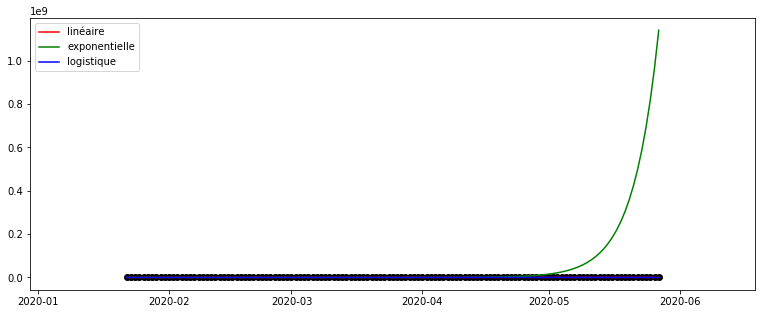

In [201]:
#affichage des graphes : 
display(HTML("<h4> Affichage des graphes de fonctions</h4>"))
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(datas_predict["total"].index, datas_predict["total"].values, color="black")
ax.plot(datas_predict["total"].index, y_lineaire, label="linéaire", color="red")
ax.plot(datas_predict["total"].index, y_exponentielle, label="exponentielle", color="green")
ax.plot(datas_predict["total"].index, y_logistic, label="logistique", color="blue")
ax.legend()
plt.show()

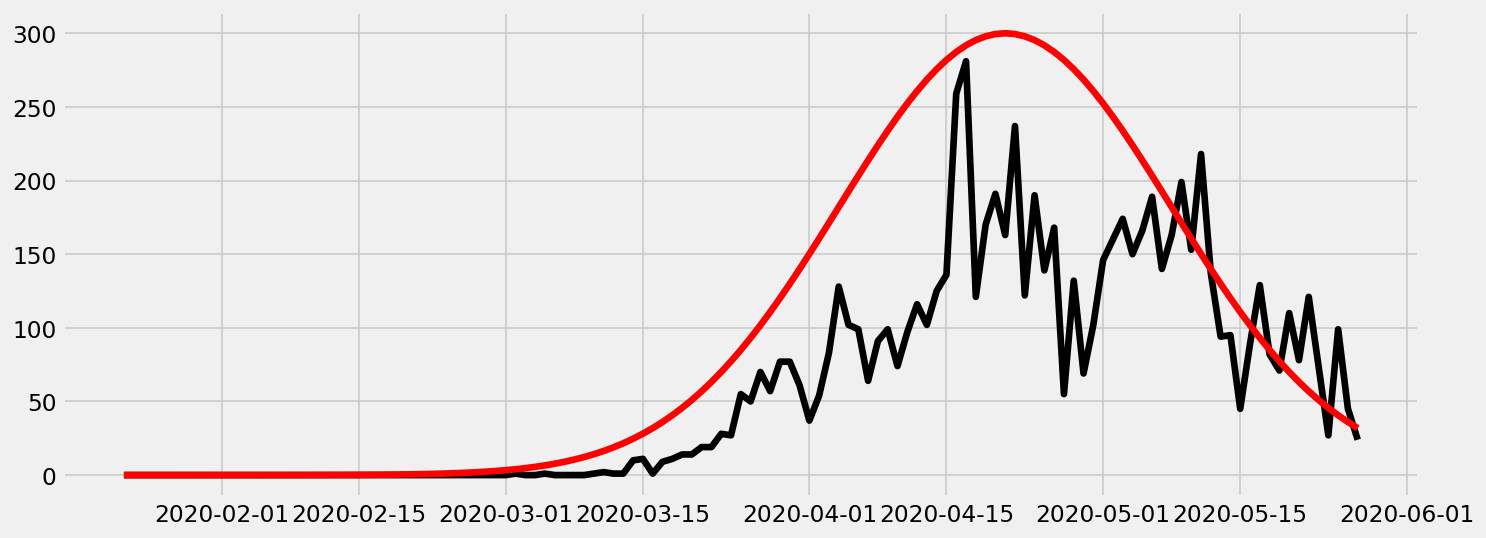

In [36]:
#affichage graphe gaussien pour les nouveaux cas  
display(HTML("<h4> Affichage graphe gaussien pour les nouveaux cas</h4>"))
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(datas_predict["new"].index, datas_predict["new"].values, color="black")
ax.plot(datas_predict["new"].index, y_gaussian, color="red")
plt.show()

In [37]:
# optimisation des calcules pour le model gaussien et logistique 
#le model logistique pour le total des cas 
#redéfinition des fonctions
#f(x) = capacity / (1 + e^-k*(x - midpoint) )
def logistic_f(X, c, k, m):
    y = c / (1 + np.exp(-k*(X-m)))
    return y

xdata = np.arange(len(datas_predict["total"]))
ydata = datas_predict["total"].values
logistic_model,cov = optimize.curve_fit(logistic_f,xdata,ydata ,p0=[np.max(datas_predict["total"]), 1, 1])

display(HTML("<h4>les paramétres du model logistique :"+ str(logistic_model)+"</h4>"))

In [38]:
#le model gaussien pour les nouveaux cas
#f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
def gaussian_f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y

xdata =np.arange(len(datas_predict["new"]))
ydata =datas_predict["new"].values
gaussian_model, cov = optimize.curve_fit(gaussian_f,xdata ,ydata ,p0=[1, np.mean(datas_predict["new"]), 1])
display(HTML("<h4>les paramétres du model gaussien  :"+ str(gaussian_model)+"</h4>"))

In [42]:
# paramétrage d'affichage plot 
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## plage 
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## les series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Ajustement paramétrique", color="black")
    dtf["model"].plot(ax=ax[0], color="green")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="red")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
   
    ## focus du dernièr 
    first_idx = dtf[pd.notnull(dtf["forecast"])].index[0]
    first_loc = dtf.index.tolist().index(first_idx)
    zoom_idx = dtf.index[first_loc-zoom]
    dtf.loc[zoom_idx:]["ts"].plot(marker=".", linestyle='None', ax=ax[1], color="black", 
                                  title="Zoom sur le dernier "+str(zoom)+" observations")
    dtf.loc[zoom_idx:]["model"].plot(ax=ax[1], color="green")
    dtf.loc[zoom_idx:]["forecast"].plot(ax=ax[1], grid=True, color="red")
    ax[1].fill_between(x=dtf.loc[zoom_idx:].index, y1=dtf.loc[zoom_idx:]['conf_int_low'], 
                       y2=dtf.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

def previsions(ts, f, model, pred_ahead=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index started first case in Marocco 03-02-2020
    index = pd.date_range(start='27-5-2020',periods=pred_ahead,freq=freq)
    index = index[1:]    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

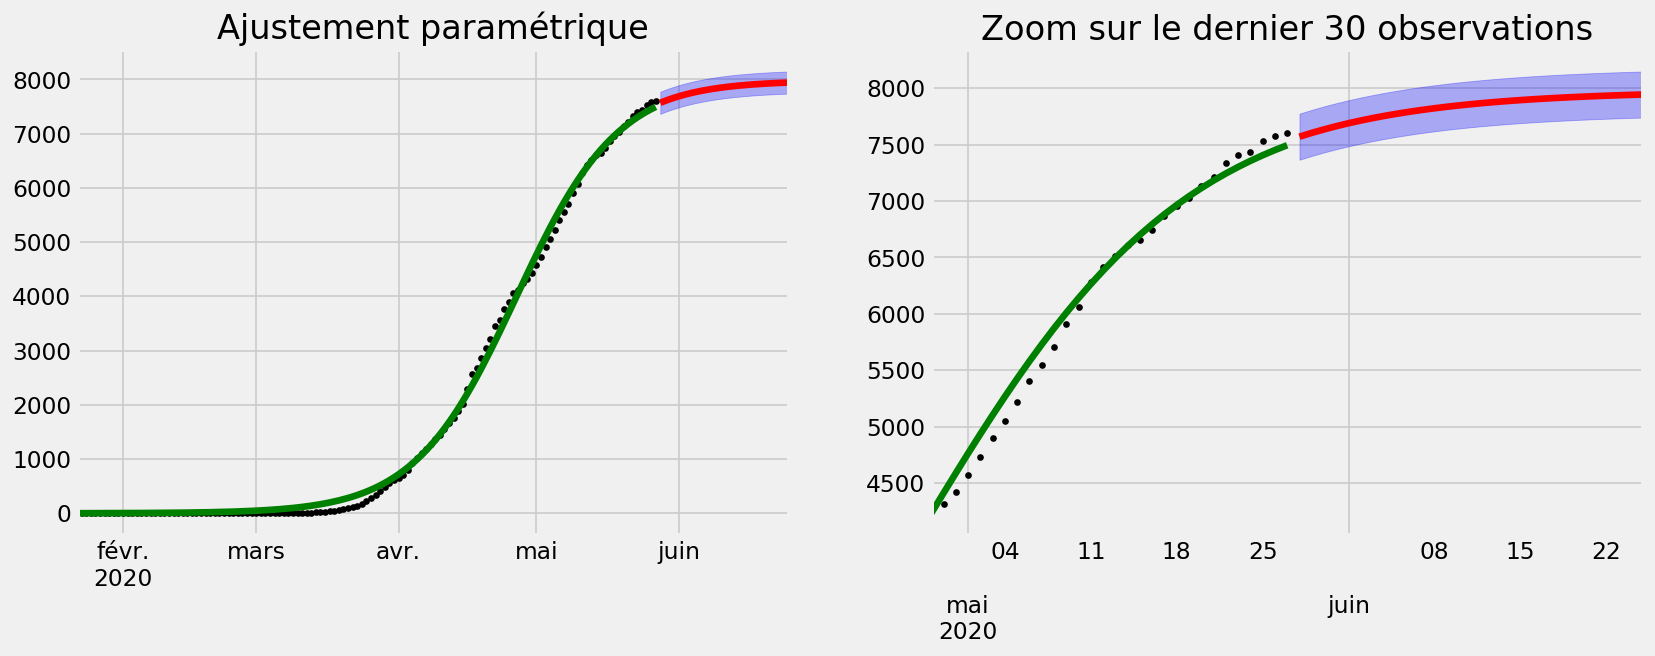

In [45]:
#'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
# model logistique 
preds_logistic = previsions(datas_predict["total"], logistic_f, logistic_model, pred_ahead=30 ,freq="D", zoom=30)

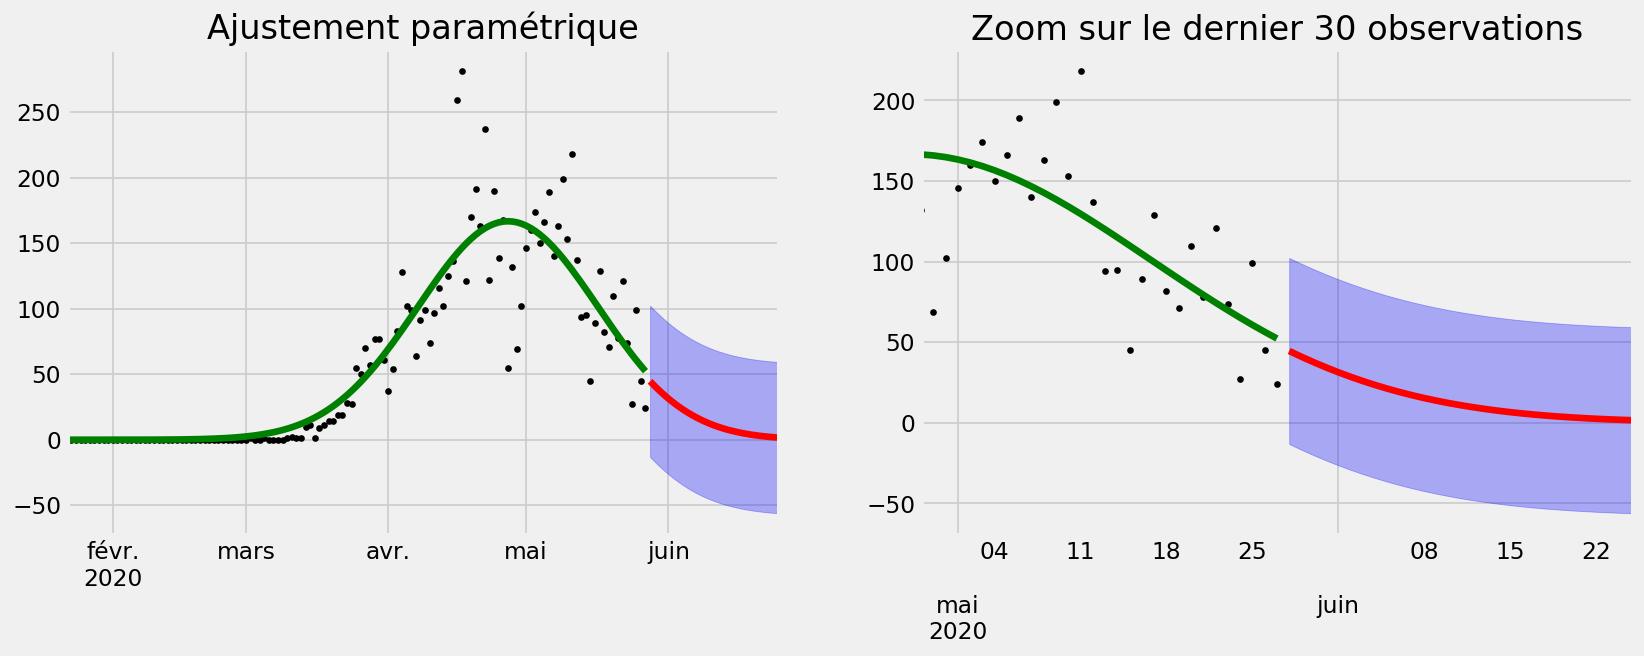

In [46]:
# model gaussien 
preds_gaussien = previsions(datas_predict["new"], gaussian_f, gaussian_model, pred_ahead=30 ,freq="D", zoom=30)

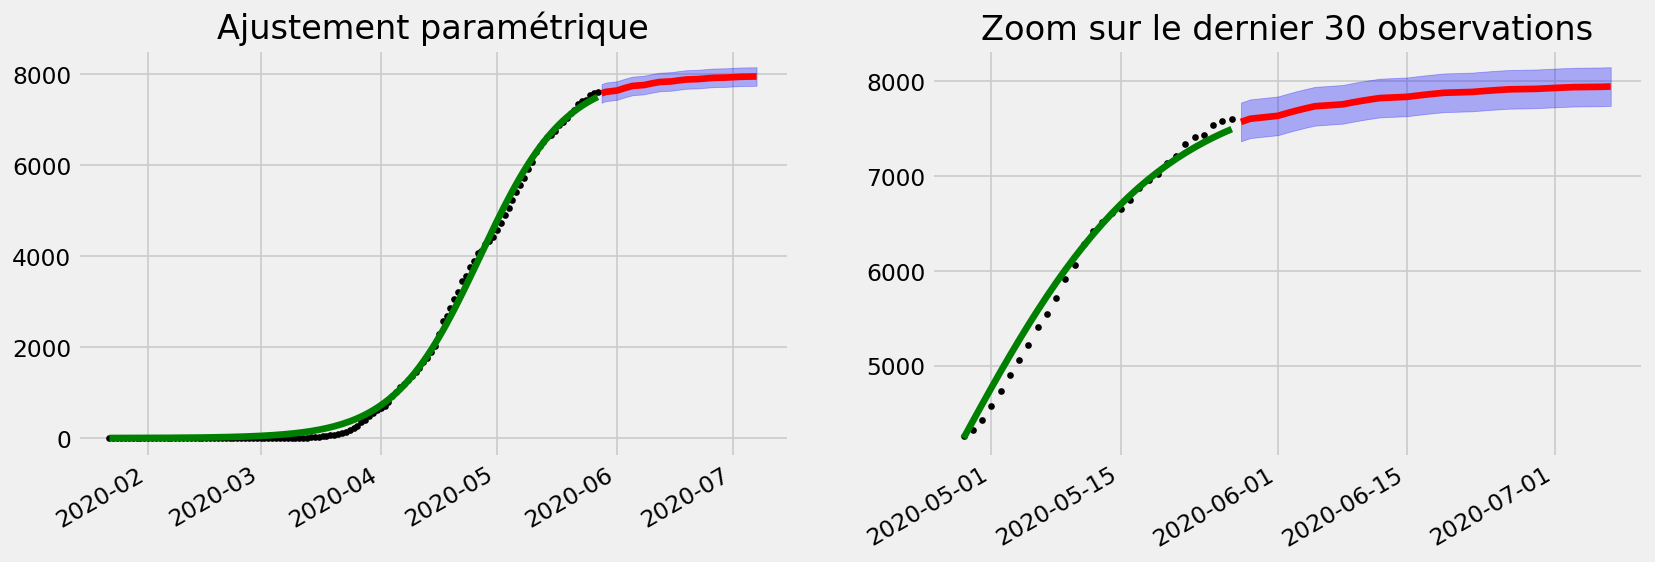

In [47]:
#par trimestre 
# model logistique 
preds_logistic = previsions(datas_predict["total"], logistic_f, logistic_model, pred_ahead=30 ,freq="B", zoom=30)

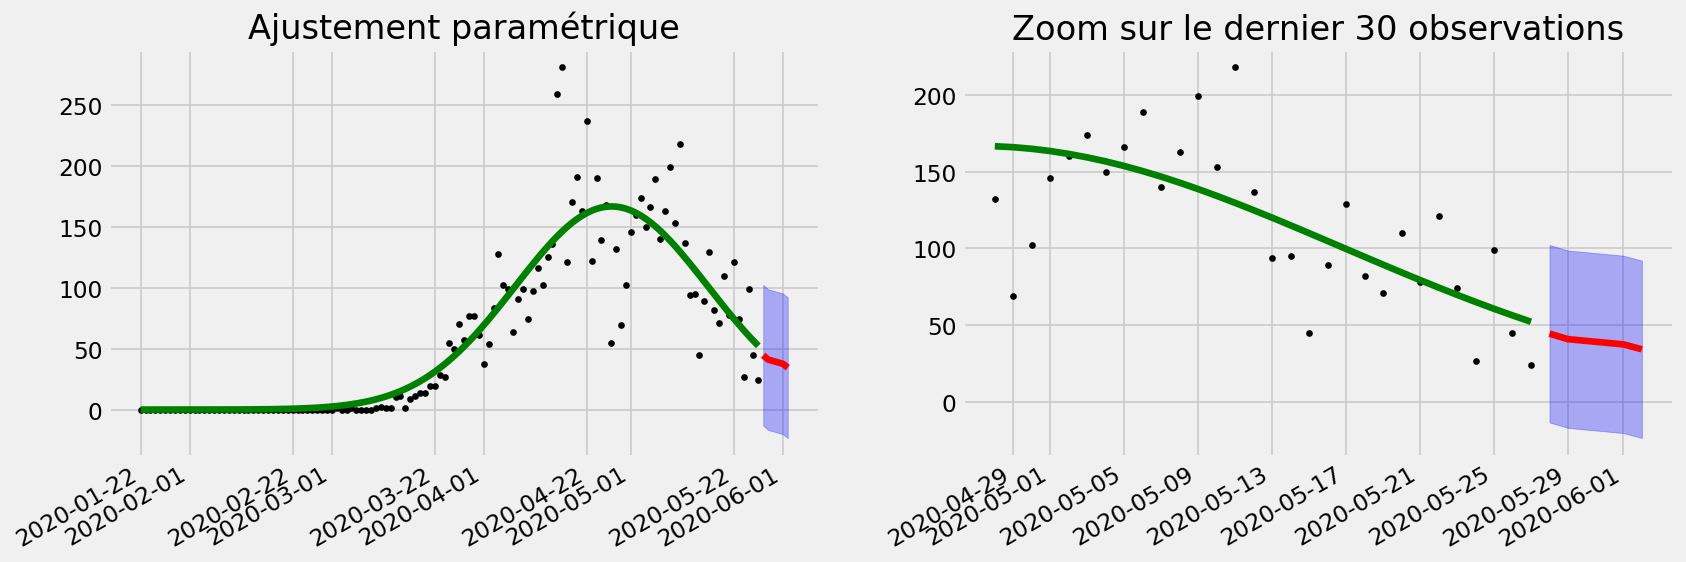

In [48]:
# model gaussien 
preds_gaussien = previsions(datas_predict["new"], gaussian_f, gaussian_model, pred_ahead=5 ,freq="B", zoom=30)

In [49]:
display(HTML("<h4> Model ARIMA pour le cas du Maroc</h4>"))

In [50]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_recovred = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_confirmed_timeseries='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_full_data='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/full_data.csv'
confirmed = pd.read_csv(url_confirmed, error_bad_lines=False)
recovred = pd.read_csv(url_recovred, error_bad_lines=False)
deaths= pd.read_csv(url_deaths, error_bad_lines=False)
timeseries_confirmed= pd.read_csv(url_confirmed_timeseries,error_bad_lines=False)
full_data=pd.read_csv(url_full_data, error_bad_lines=False)
df = timeseries_confirmed.fillna('unknow')
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df = df.iloc[df.shape[0] - 1][4:df.shape[1]]
timeseries_confirmed = timeseries_confirmed.loc[timeseries_confirmed.loc[timeseries_confirmed.sum(axis=1) > 0].index[0]:]
#Maroc 
pays = ['Morocco']
# Filtrage des données par pays.

timeseries_mar = timeseries_confirmed.loc[timeseries_confirmed['Country/Region'].isin(pays)].copy().reset_index(drop=True)
# Transformer les dataframes en séries temporelles . 
def to_series(df):
    #supprimer les colonnes 'Province/State','Lat','Long'
    df_trans = df.drop(columns=['Province/State','Lat','Long']).rename(columns={'Country/Region':' '}).set_index(' ').transpose()
    #transposer le dataframe on index colonne date 
    df_trans.index = pd.to_datetime(df_trans.index)
    return(df_trans)

df1= to_series(timeseries_mar)
display(HTML("<h4>L'hypothèse nulle du test ADF est que la série chronologique n'est pas stationnaire. Donc, si la valeur de p du test est inférieure au niveau de signification (0,05), vous rejetez l'hypothèse nulle et inférez que la série chronologique est en effet stationnaire.</h4>"+"<h4>Donc, dans notre cas, si la valeur P> 0,05, nous allons de l'avant pour trouver l'ordre de différenciation.</h4>"))

In [51]:
result = adfuller(df1.dropna())
display(HTML("<div><ul> <li>ADF Statistic: "+ str(result[0])+"</li><li>p-value: "+str(result[1])+"</li> </ul><span> Étant donné que la valeur P est supérieure au niveau de signification, différencions la série et voyons à quoi ressemble le tracé d'autocorrélation</span></div>"))


In [52]:
split_point = len(df1) - 4
dataset, validation = df1[0:split_point], df[split_point:]
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)
display(HTML("<div><ul> <li> dataset : "+str(len(dataset))+"</li><li>data validation : "+str(len(validation))+"</li> </ul></div>"))

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    display(HTML("<div><ul> <li>Predicted = "+str(yhat)+"</li><li>Expected = "+str(obs)+"</li> </ul></div>"))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
display(HTML("<h5>RMSE = "+str(rmse)+"</h5>"))

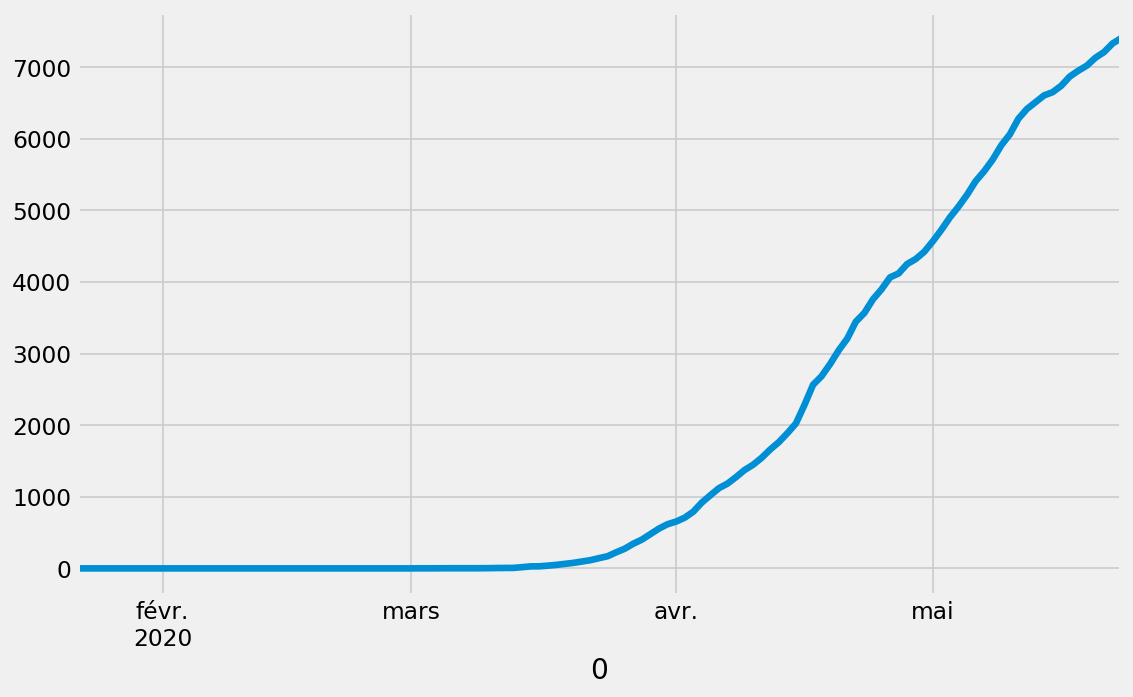

In [54]:
series.plot()
display(HTML("<p> Rq : Il y a une tendance croissante au fil du temps, ce qui signifie que l'ensemble de données n'est pas stationnaire.</p>"))

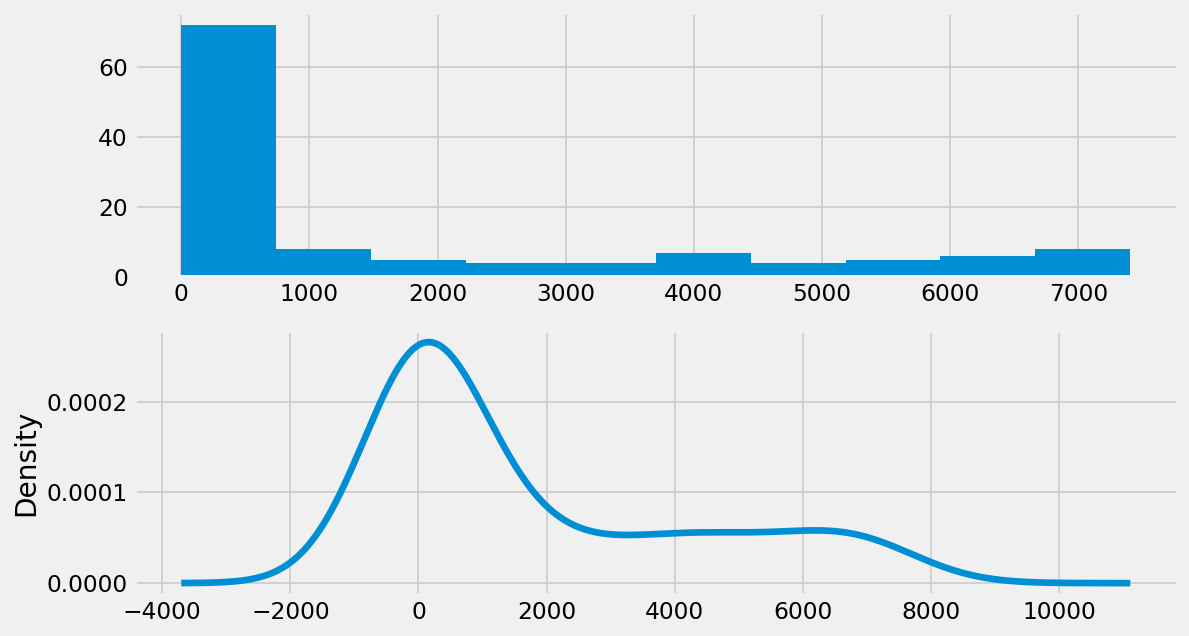

In [55]:
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()
display(HTML("<p> Rq : La distribution n'est pas gaussienne - La distribution est décalée vers la gauche et peut être exponentielle ou double gaussienne.</p>"))

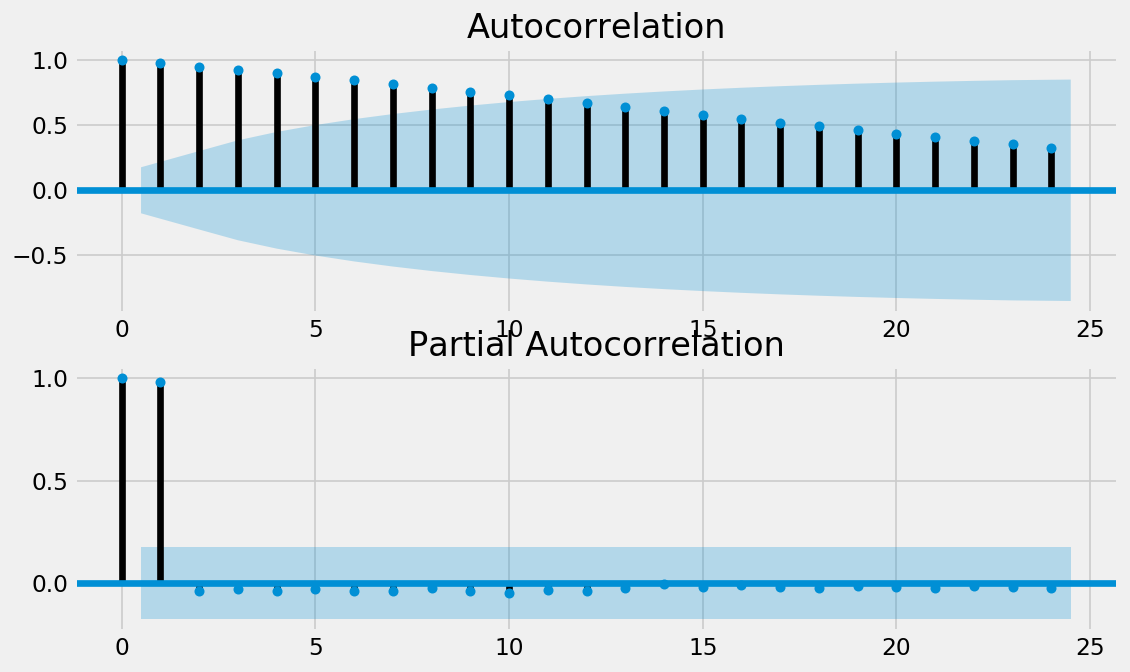

In [56]:
#ARIMA configuré manuellement
#ARIMA (p, d, q) nécessite 3 paramètres et est traditionnellement configuré manuellement. Nous allons essayer de deviner les valeurs probables, à partir de d.
display(HTML("<div>La série chronologique n'est pas stationnaire. Nous pouvons le rendre stationnaire en différenciant la série,la serie n'est encore stationnaire malgé la première differenciation </div>"))
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, lags=24, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=24, ax=plt.gca())
plt.show()

In [57]:
display(HTML("<div><ul><li>L'ACF montre un retard important pendant les 1-2 mois </li><li>Le PACF ne montre pas de retard significatif</li></ul></div>"))

In [58]:
import pmdarima as pm
from pmdarima import auto_arima
# Seasonal - fit stepwise auto-ARIMA
model = pm.auto_arima(history, start_p=4, start_q=0,
                         test='adf',
                         max_p=10, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


#smodel.summary()
results = model.fit(dataset)


Performing stepwise search to minimize aic
Fit ARIMA(4,2,0)x(0,1,1,12) [intercept=True]; AIC=1092.907, BIC=1111.746, Time=5.785 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1174.507, BIC=1179.890, Time=0.061 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1116.782, BIC=1127.547, Time=1.394 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1089.125, BIC=1099.891, Time=2.322 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1172.578, BIC=1175.269, Time=0.076 seconds
Fit ARIMA(4,2,0)x(0,1,0,12) [intercept=True]; AIC=1149.606, BIC=1165.754, Time=0.747 seconds
Fit ARIMA(4,2,0)x(1,1,1,12) [intercept=True]; AIC=1093.205, BIC=1114.736, Time=3.299 seconds
Near non-invertible roots for order (4, 2, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

In [59]:
#Une bonne vérification finale consiste à examiner les erreurs de prévision résiduelles.
#Idéalement, la distribution devrait être gaussienne avec une moyenne nulle.
best_cfg=(4, 2, 0)


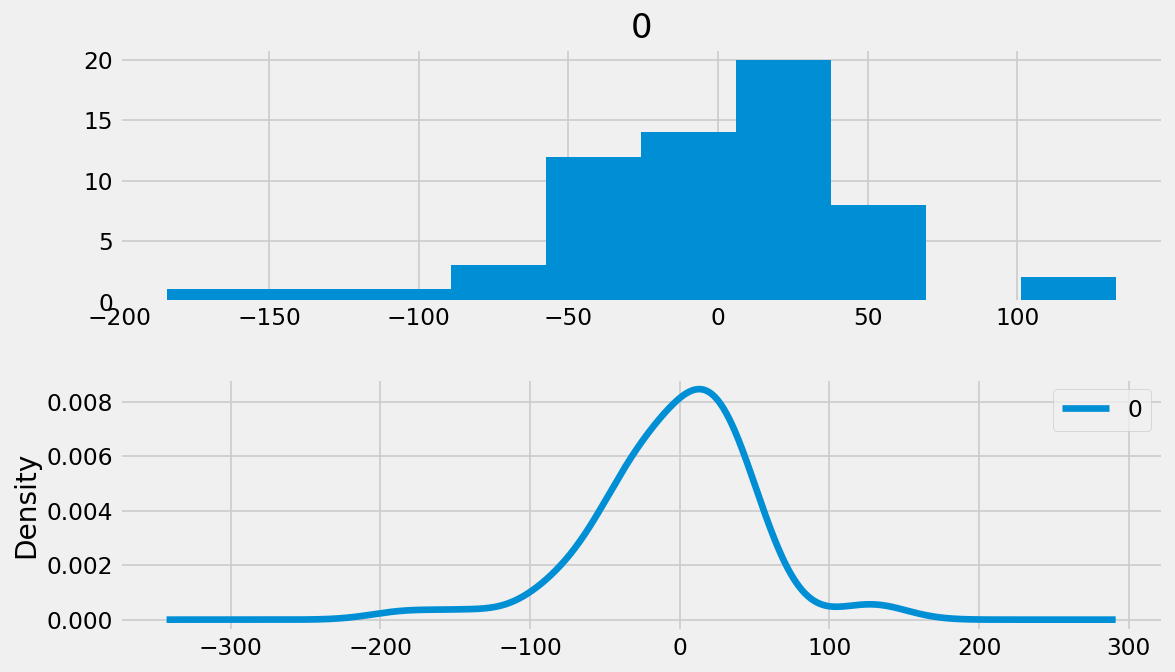

In [60]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=best_cfg)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
   # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

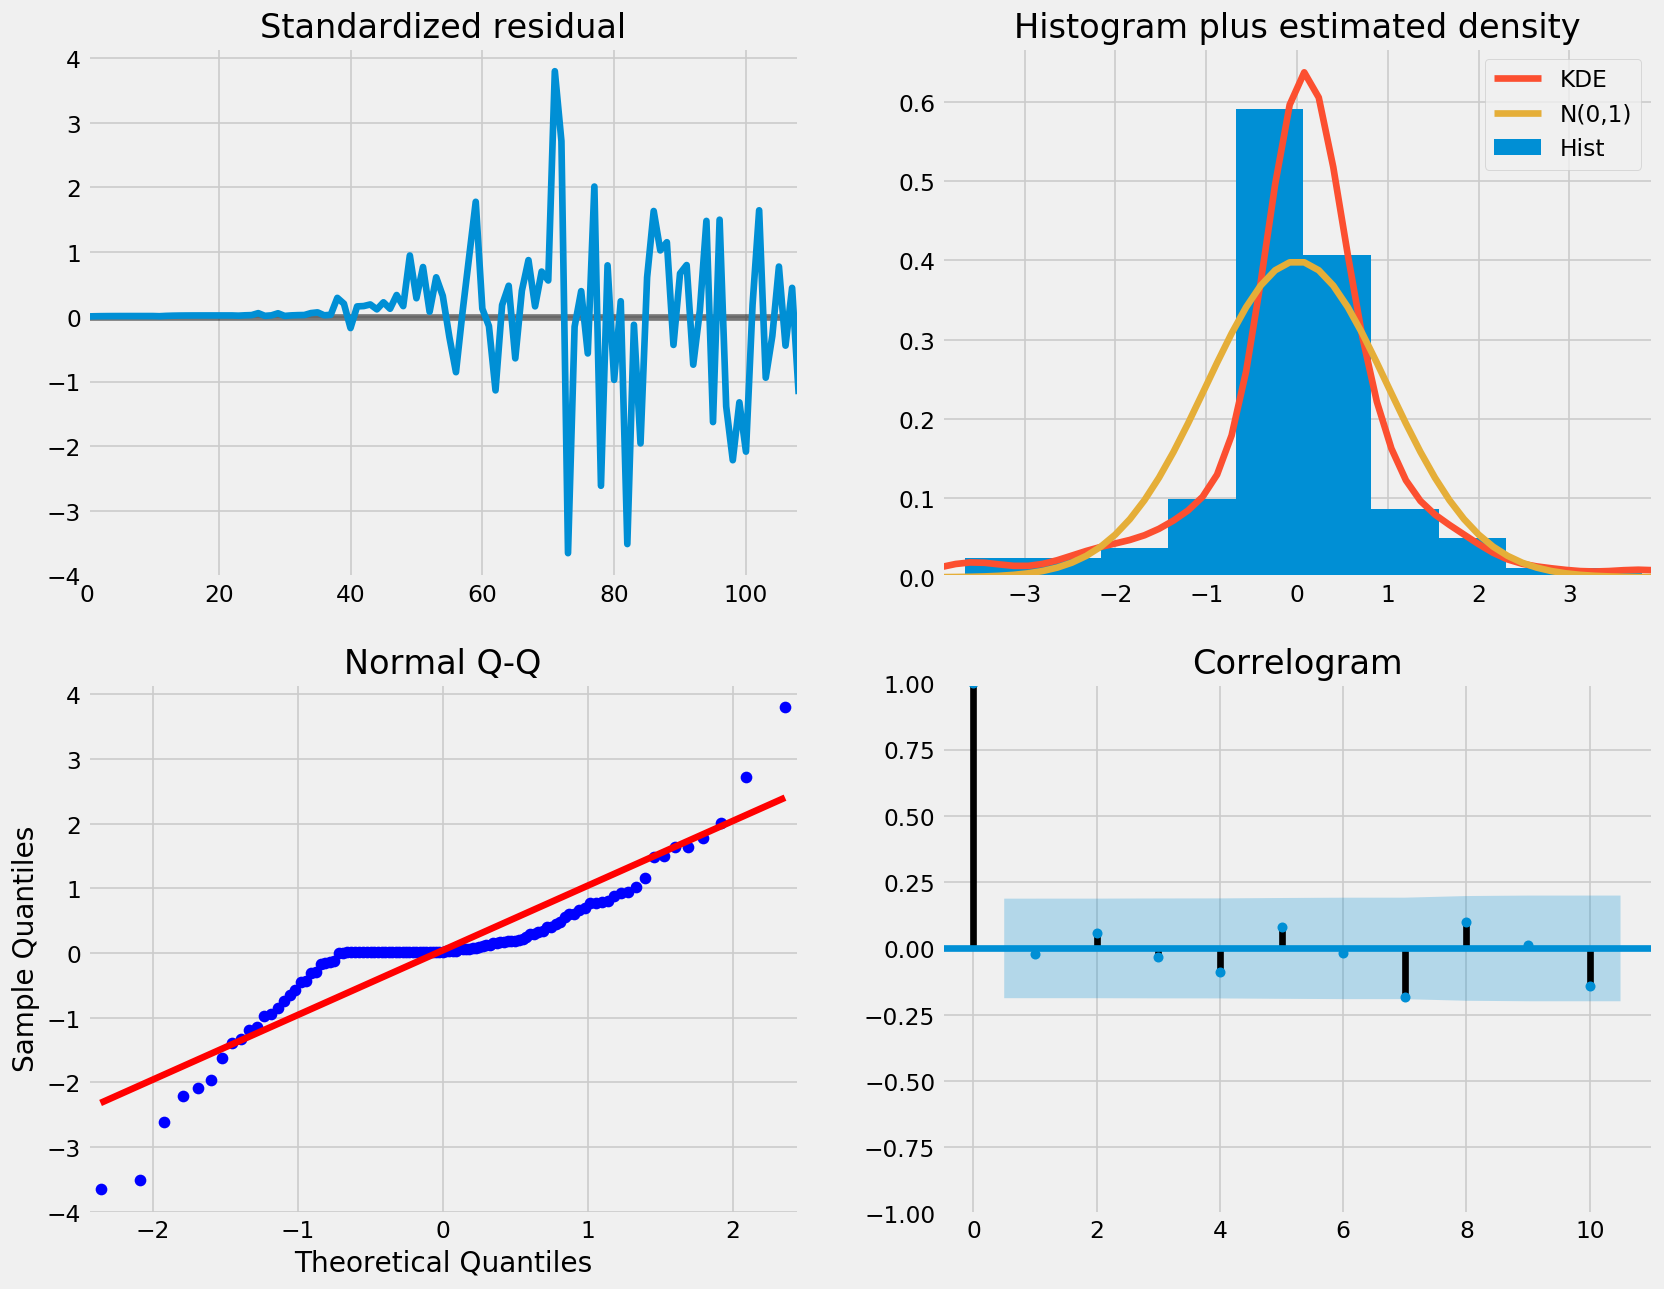

In [61]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [62]:
display(HTML("<div>Nous pouvons maintenant charger le modèle et l'utiliser de manière prévisionnelle continue, en mettant à jour la transformation et le modèle pour chaque pas de temps.</div>"))

predicted=1616.275957, expected=1661.000000
predicted=1783.333345, expected=1763.000000
predicted=1858.523077, expected=1888.000000
predicted=2002.387115, expected=2024.000000
predicted=2156.066362, expected=2283.000000
predicted=2541.714229, expected=2564.000000
predicted=2873.871225, expected=2685.000000
predicted=2742.485631, expected=2855.000000
predicted=3100.447808, expected=3046.000000
predicted=3267.228221, expected=3209.000000
predicted=3417.287459, expected=3446.000000
predicted=3645.371960, expected=3568.000000
predicted=3696.086402, expected=3758.000000
predicted=3992.679311, expected=3897.000000
predicted=4029.348612, expected=4065.000000
predicted=4272.024316, expected=4120.000000
predicted=4227.690055, expected=4252.000000
predicted=4377.009216, expected=4321.000000
predicted=4438.538767, expected=4423.000000
predicted=4510.852970, expected=4569.000000
predicted=4687.743369, expected=4729.000000
predicted=4869.419469, expected=4903.000000
predicted=5054.060292, expected=

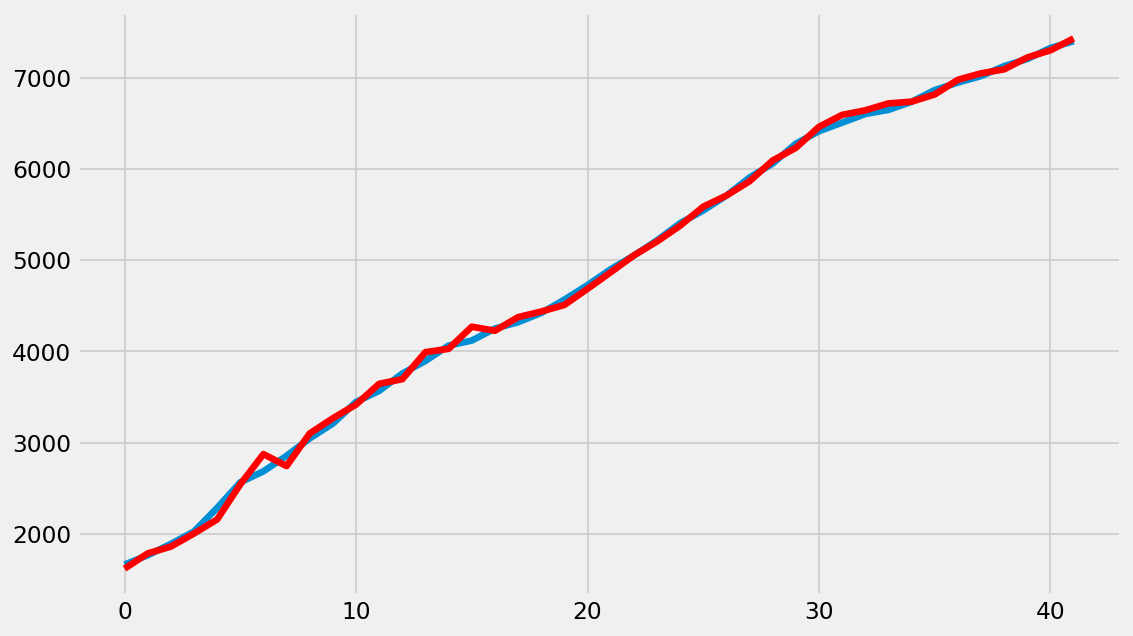

In [69]:
import matplotlib.pyplot 
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
display(HTML("<div>Test MSE:"+str(error)+"</div>"))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [73]:
model = pm.auto_arima(history, start_p=4, start_q=0,
                         test='adf',
                         max_p=10, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(4,2,0)x(0,1,1,12) [intercept=True]; AIC=1092.907, BIC=1111.746, Time=6.555 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1174.507, BIC=1179.890, Time=0.097 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1116.782, BIC=1127.547, Time=1.493 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1089.125, BIC=1099.891, Time=2.146 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1172.578, BIC=1175.269, Time=0.061 seconds
Fit ARIMA(4,2,0)x(0,1,0,12) [intercept=True]; AIC=1149.606, BIC=1165.754, Time=0.568 seconds
Fit ARIMA(4,2,0)x(1,1,1,12) [intercept=True]; AIC=1093.205, BIC=1114.736, Time=3.052 seconds
Near non-invertible roots for order (4, 2, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

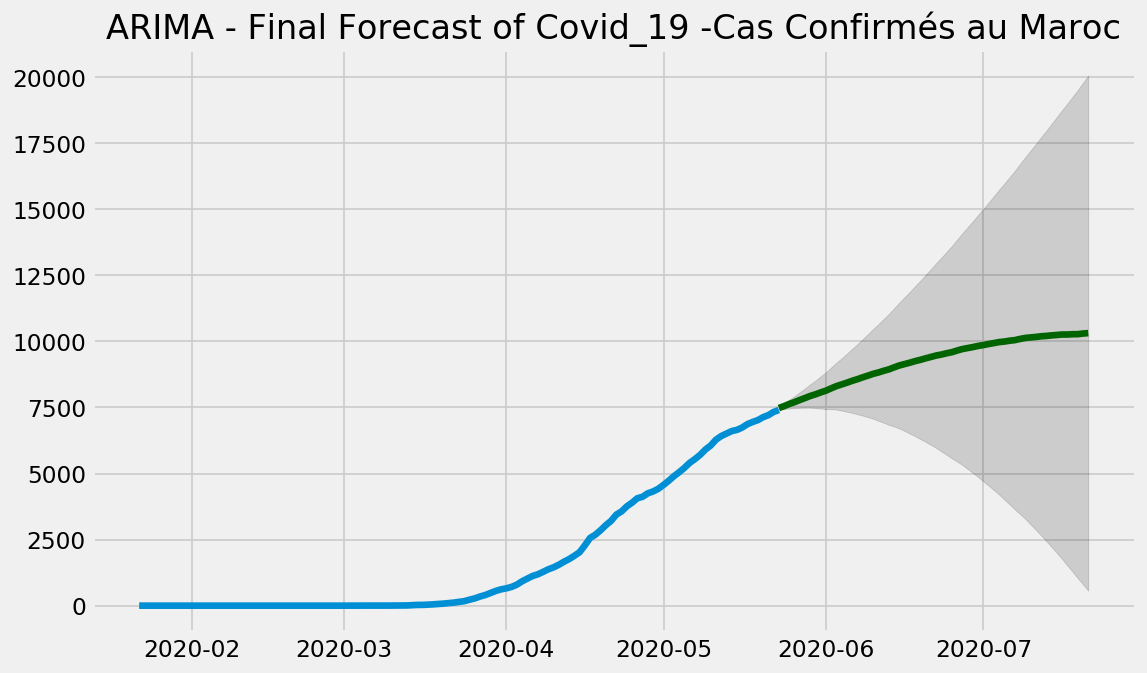

In [74]:
n_periods = 60
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dataset.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dataset)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Final Forecast of Covid_19 -Cas Confirmés au Maroc")
plt.show()